<a href="https://colab.research.google.com/github/VijjaSetiadi/Project-1-G211220098/blob/main/MiniProject_G_211_22_0098.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
from google.colab import files
uploaded = files.upload()

Saving retail_raw_reduced.csv to retail_raw_reduced.csv


NAMA : VIJJA SETIADI

NIM : G.211.22.0098

In [15]:
dataset = pd.read_csv("retail_raw_reduced.csv")

Mini Project

Buatlah sebuah line chart dengan menggunakan matplotlib yang menunjukkan
jumlah pembeli harian (daily number of customers) selama bulan Desember.

Studi Kasus dari Senja: Daily number of customers on Desember

Dengan menggunakan dataset yang sama (‘https://dqlab-dataset.s3-ap-southeast1.amazonaws.com/retail_raw_reduced.csv'), buatlah sebuah line chart dengan
Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers)
selama bulan Desember.
Beberapa spesifikasi yang harus diperhatikan:

 Ukuran figure adalah 10x5

 Sumbu-x adalah tanggal pembelian, dari tanggal 1–31 Desember 2019

 Sumbu-y adalah jumlah unique customers di tiap tanggal

 Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri

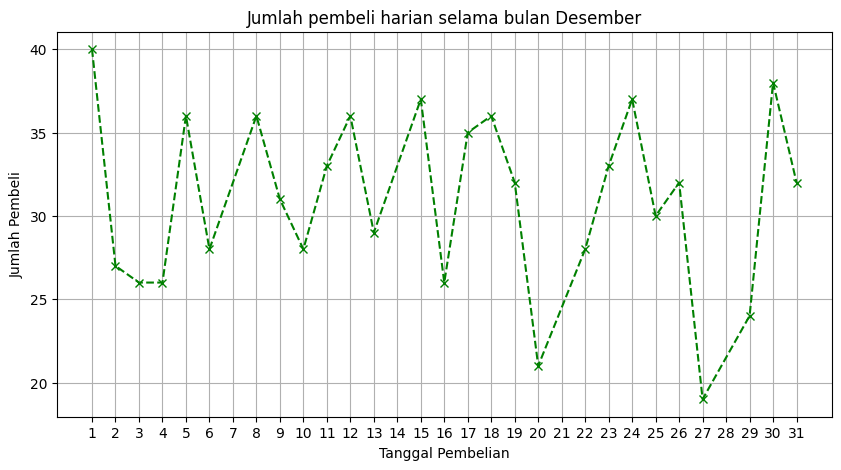

In [16]:
""" Mengconvert Field order_date to datetime """
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

""" Data Pembelian tanggal 1-31 Desember 2019 """
december = dataset[(dataset['order_date'].dt.year == 2019) & (dataset['order_date'].dt.month == 12)]
daily_customers_december = december.groupby(december['order_date'].dt.day)['customer_id'].nunique()

""" Membuat Line chart dengan menggunakan yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember. """
plt.figure(figsize=(10, 5))
plt.plot(daily_customers_december.index, daily_customers_december.values, marker='x', color='green', linestyle='--')
plt.title('Jumlah pembeli harian selama bulan Desember')
plt.xlabel('Tanggal Pembelian')
plt.ylabel('Jumlah Pembeli')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

Case 1: Menentukan brand top 5
Lakukan analisis untuk top brands di bulan Desember 2019, di bawah ini adalah beberapa hal yang perlu
dilakukan. Silahkan ditambahkan dengan visualisasi-visualisasi lain yang kira-kira dapat memberikan insight
tambahan.

brand
BRAND_S    2197
BRAND_P    2194
BRAND_R    1508
BRAND_C    1365
BRAND_A    1315
Name: quantity, dtype: int64


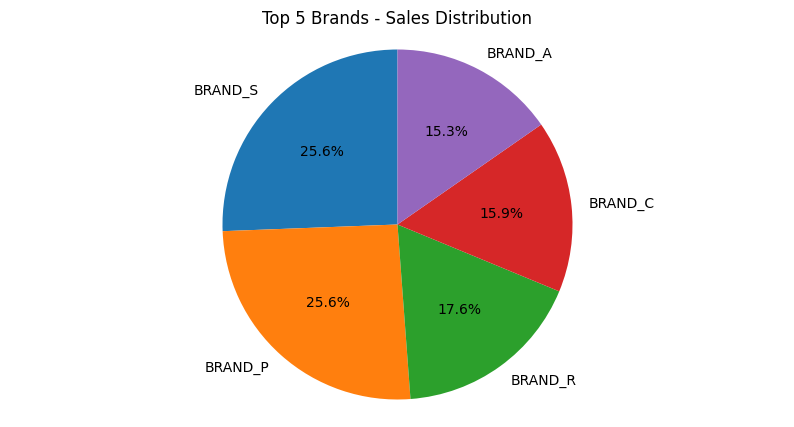

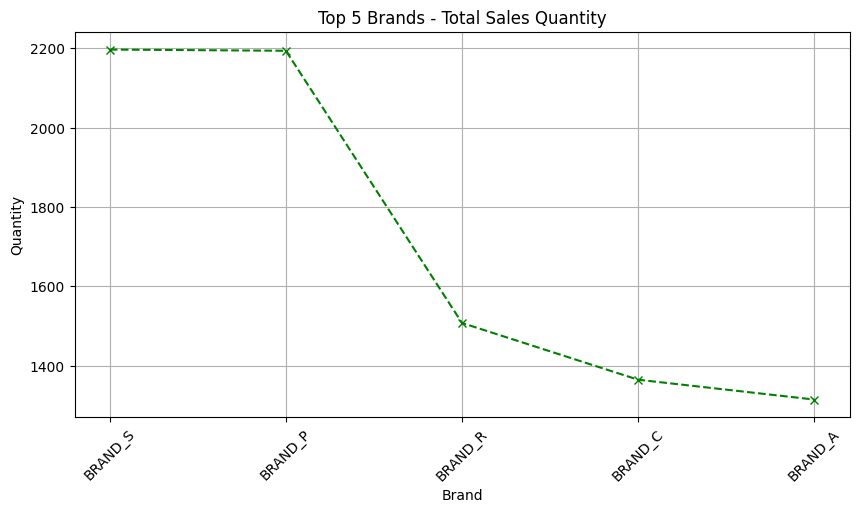

In [17]:
""" Mengconvert Field order_date to datetime """
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

""" Data Pembelian Desember 2019 """
december = dataset[(dataset['order_date'].dt.year == 2019) & (dataset['order_date'].dt.month == 12)]

""" Menghitung total quantity yang terjual berdasarkan brand """
brand_sales = december.groupby('brand')['quantity'].sum().sort_values(ascending=False)

""" Top 5 brands """
top5brand = brand_sales.head(5)
print(top5brand)

""" Membuat pie chart """
plt.figure(figsize=(10, 5))
plt.pie(top5brand, labels=top5brand.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Brands - Sales Distribution')
plt.axis('equal')

""" membuat line chart """
plt.figure(figsize=(10, 5))
plt.plot(top5brand.index, top5brand, marker='x', color='green', linestyle='--')

plt.title('Top 5 Brands - Total Sales Quantity')
plt.xlabel('Brand')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Case 1:
Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya
untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands
tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan data frame ini.

In [18]:
""" Mengconvert order_date to datetime """
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

""" Data untuk bulan Desember 2019 """
december = dataset[(dataset['order_date'].dt.year == 2019) & (dataset['order_date'].dt.month == 12)]

""" Menghitung total quantity terjual per brand """
brand_quantity = december.groupby('brand')['quantity'].sum()

""" Mengurutkan brand berdasarkan total quantity terjual """
top_5_brands = brand_quantity.nlargest(5).index

""" Membuat variabel baru dengan data penjualan bulan Desember 2019 untuk top 5 brand """
dataset_top5brand_dec = december[december['brand'].isin(top_5_brands)]

""" Menampilkan top 5 brands """
print("Top 5 brands in December 2019:")
print(top_5_brands)

Top 5 brands in December 2019:
Index(['BRAND_S', 'BRAND_P', 'BRAND_R', 'BRAND_C', 'BRAND_A'], dtype='object', name='brand')


Case 2: Multi-line chart daily quantity untuk brand top 5
Buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1
tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain).
Beri anotasi untuk titik lonjakan tersebut.

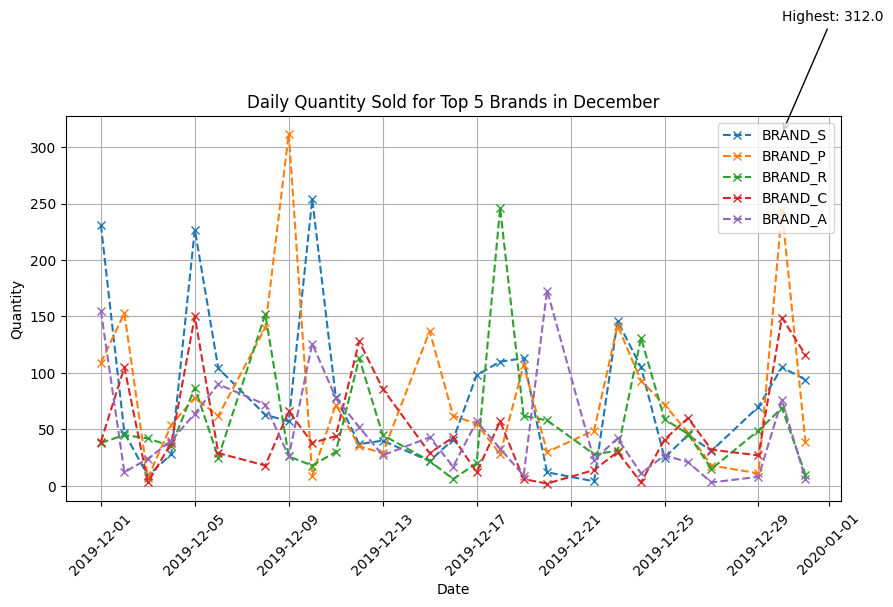

In [19]:
plt.figure(figsize=(10, 5))
daily_quantity = december.pivot_table(index='order_date', columns='brand', values='quantity', aggfunc='sum')
for brand in top_5_brands:
    plt.plot(daily_quantity.index, daily_quantity[brand], marker='x', linestyle='--', label=brand)

""" Menemukan lonjakan quantity tertinggi """
daily_quantity = december.pivot_table(index='order_date', columns='brand', values='quantity', aggfunc='sum')
lonjakan_tanggal = daily_quantity.idxmax().max()
lonjakan_quantity = daily_quantity.max().max()
""" anotasi titik lonjakan """
plt.annotate(f'Highest: {lonjakan_quantity}',
             xy=(lonjakan_tanggal, lonjakan_quantity),
             xytext=(lonjakan_tanggal, lonjakan_quantity + 100),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.title('Daily Quantity Sold for Top 5 Brands in December')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Case 3:
Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan
barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.

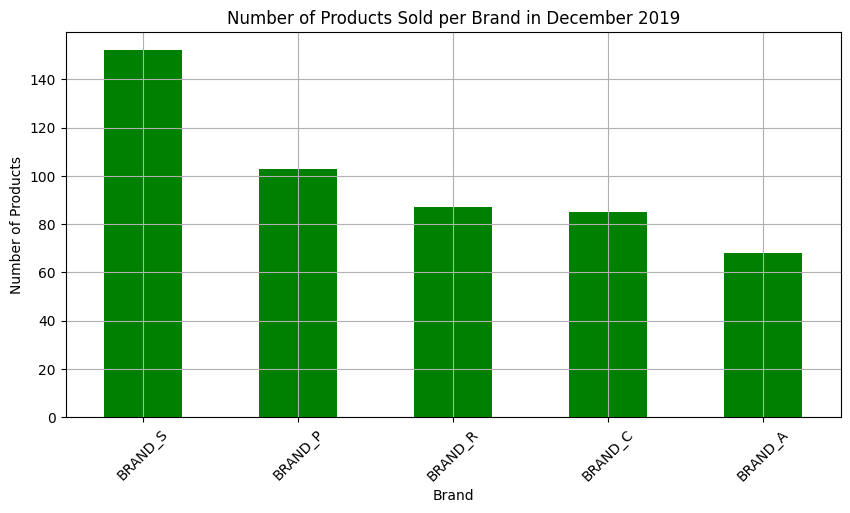

In [20]:
"""Mengurutkan brand berdasarkan jumlah product terjual"""
x = dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

"""Membuat Bar Chart"""
plt.figure(figsize=(10, 5))
x.plot(kind='bar' ,color="green")
plt.title('Number of Products Sold per Brand in December 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Case 4: Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019
Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di
bulan Desember 2019. Apakah ada pola yang menarik?

<Figure size 1000x500 with 0 Axes>

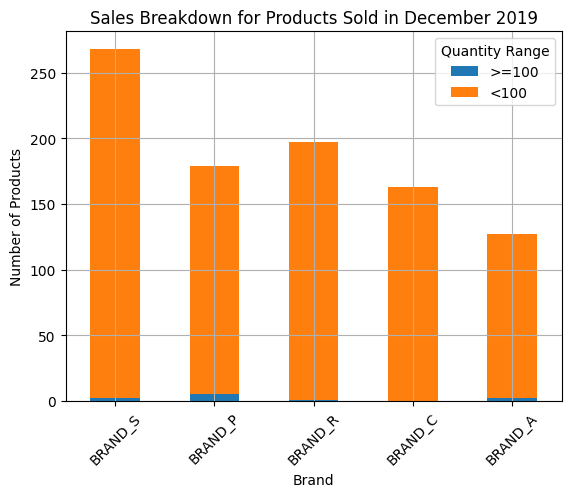

In [22]:
""" data product yang terjual >= 100 """
above100 = dataset_top5brand_dec[dataset_top5brand_dec['quantity'] >= 100]
above100count = above100.groupby('brand')['product_id'].count()

""" Membuat dataframe untuk product yang terjual < 100 """
below100 = dataset_top5brand_dec[dataset_top5brand_dec['quantity'] < 100]
below100count = below100.groupby('brand')['product_id'].count()

""" Menggabungkan kedua dataframe """
stacked_data = pd.concat([above100count, below100count], axis=1)
stacked_data.columns = ['>=100', '<100']
stacked_data = stacked_data.reindex(x.index)

""" Membuat stacked chart """
plt.figure(figsize=(10, 5))
stacked_data.plot(kind='bar', stacked=True)
plt.title('Sales Breakdown for Products Sold in December 2019')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.legend(title='Quantity Range')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Case 5: Murah atau mahalkah harga produk brand top 5
Gunakan histogram untuk melihat distribusi harga product-product yang ada di top 5 brand tersebut (untuk tiap
product_id, ambil median harganya). Bagaimana persebaran harga product nya? Cenderung banyak yang murah
atau yang mahal?

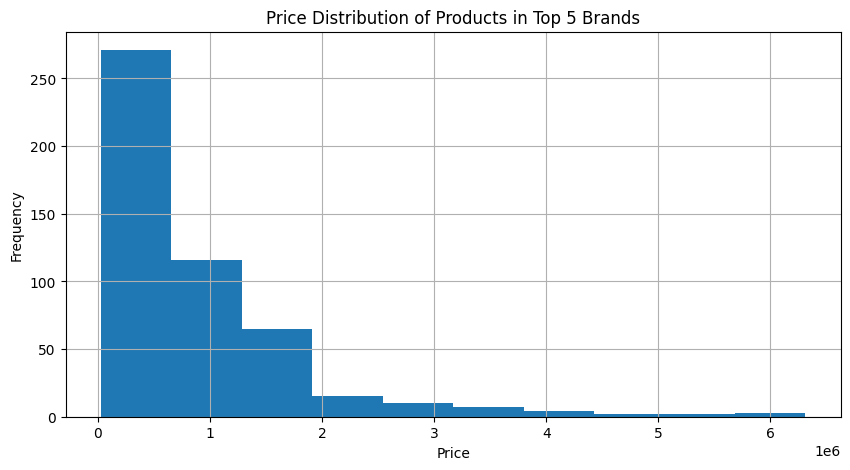

In [23]:
""" Menentukan Median """
a=dataset_top5brand_dec.groupby(['brand', 'product_id'])['item_price'].median()

""" Membuat Histogram """
plt.figure(figsize=(10, 5))
plt.hist(a, bins=10, alpha=1)
plt.title('Price Distribution of Products in Top 5 Brands')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Case 6a: Korelasi quantity vs GMV
Untuk setiap product_id, cek scatterplot antara quantity dan GMV, apakah ada korelasi? Bagaimana dengan
median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

<ipython-input-24-cf2d36a3ae86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top5brand_dec['GMV'] = dataset_top5brand_dec['quantity'] * dataset_top5brand_dec['item_price']


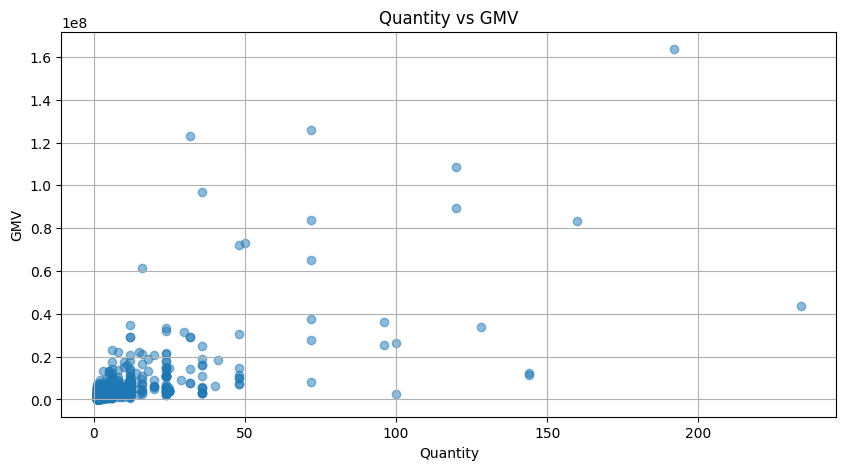

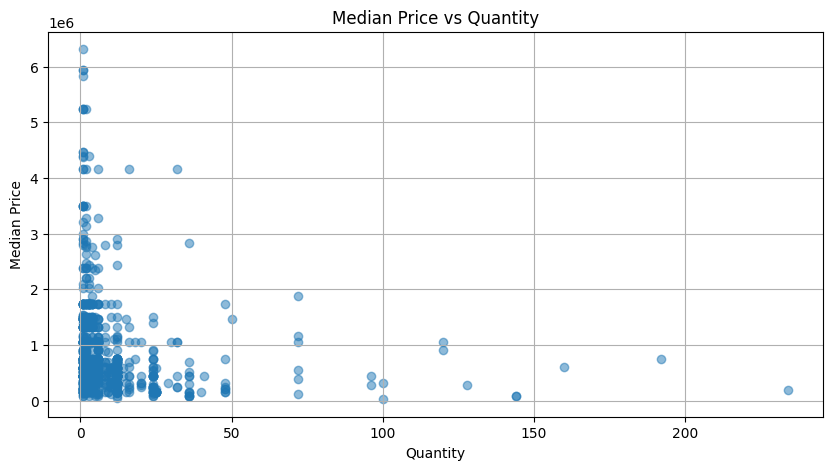

In [24]:
""" Menghitung GMV """

dataset_top5brand_dec['GMV'] = dataset_top5brand_dec['quantity'] * dataset_top5brand_dec['item_price']

""" Membuat scatter plot quantity vs GMV """
plt.figure(figsize=(10, 5))
plt.scatter(dataset_top5brand_dec['quantity'], dataset_top5brand_dec['GMV'], alpha=0.5)

plt.title('Quantity vs GMV')
plt.xlabel('Quantity')
plt.ylabel('GMV')

plt.grid(True)
plt.show()

""" median harga per product_id """
median = dataset_top5brand_dec.groupby('product_id')['item_price'].median()

""" scatter plot median harga vs quantity """
plt.figure(figsize=(10, 5))
plt.scatter(dataset_top5brand_dec['quantity'], median[dataset_top5brand_dec['product_id']], alpha=0.5)
plt.title('Median Price vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()

Case 6b: Korelasi median harga vs quantity
Untuk setiap product_id, cek scatterplot antara quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case
6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih
banyak?

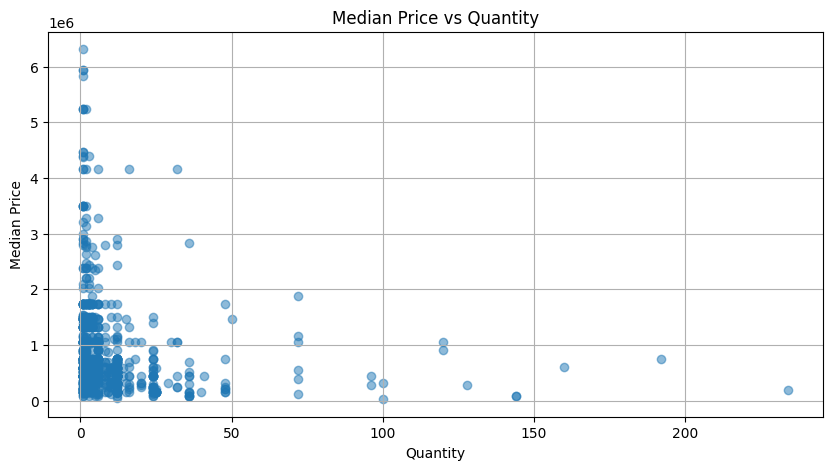

In [25]:
""" median harga per product_id """
median = dataset_top5brand_dec.groupby('product_id')['item_price'].median()

""" Membuat scatter plot median harga vs quantity """
plt.figure(figsize=(10, 5))
plt.scatter(dataset_top5brand_dec['quantity'], median[dataset_top5brand_dec['product_id']], alpha=0.5)
plt.title('Median Price vs Quantity')
plt.xlabel('Quantity')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()